## 1. 下準備

まず、Colaboratoryの設定を変更します。

左上の「編集」→「ノートブックの設定」と移動して、「ハードウェアアクセラレータ」を「GPU」に切り替えます。

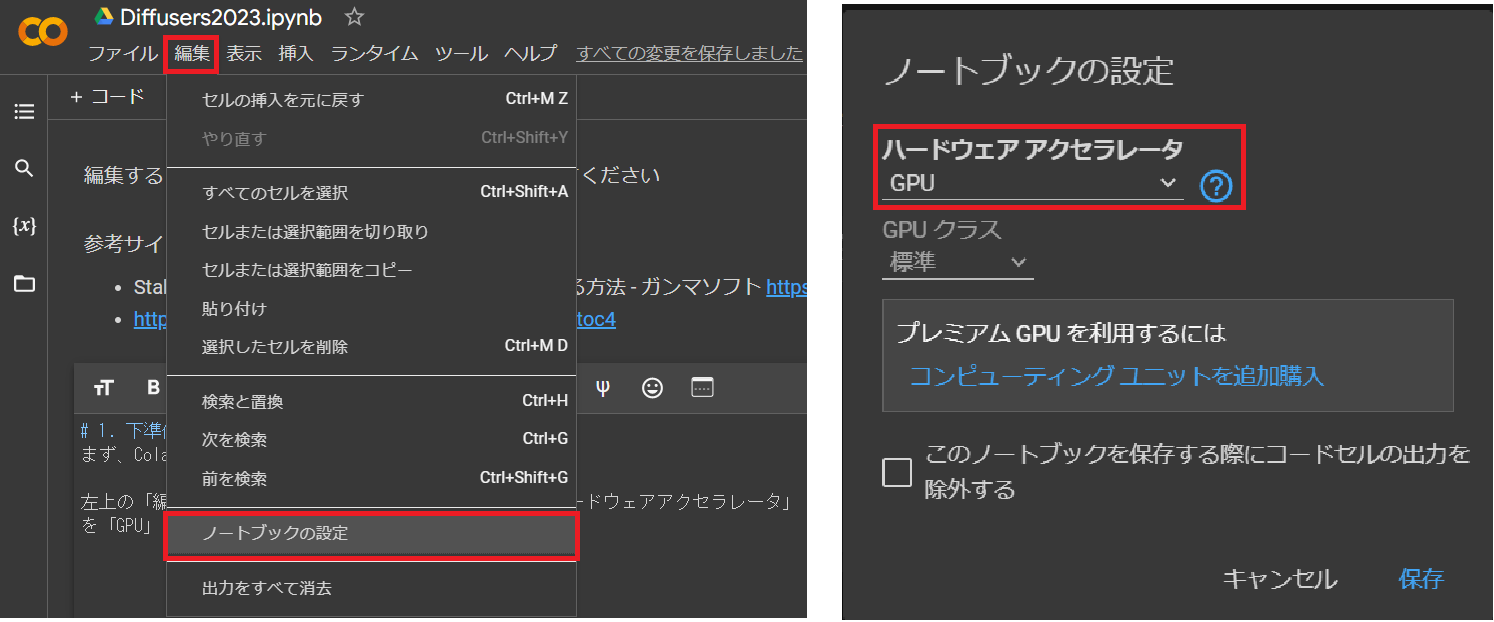

## 2．ライブラリのインストール

In [ ]:
# ライブラリのインストール
!pip install googletrans==4.0.0-rc1
!pip install diffusers transformers ftfy accelerate
# パッケージのインポート
import torch
from googletrans import Translator
import datetime
from IPython.display import Image
from diffusers import StableDiffusionPipeline

## 3．作りたい画像の雰囲気を決めよう

In [ ]:
# モデルの指定
model_id = "stabilityai/stable-diffusion-2" #@param ["stabilityai/stable-diffusion-2", "CompVis/stable-diffusion-v1-4", "hakurei/waifu-diffusion", "prompthero/openjourney"]
device = "cuda"
# パイプラインの作成
if model_id == "prompthero/openjourney":
  revision = "main"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16)
elif model_id == "stabilityai/stable-diffusion-2":
  revision = "fp16"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
else:
  revision = "fp16"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

##4. AIにつくらせたい画像を指示しよう
「textja」に日本語を入力 or 「texten」に英語を入力

In [ ]:
#作成したい画像データを日本語で指定
textja = "" # @param{type: "string"}

if textja != "":
  #入力された日本語を英語に翻訳
  tr = Translator()
  texten = tr.translate(textja, src="ja", dest="en").text
  # 翻訳された英語を表示
  print(texten)
else:
  #作成したい画像データを英語で指定
  texten = "" # @param{type: "string"}

##5. 画像を出力しよう

In [ ]:
# プロンプト
prompt = texten

# パイプラインの実行
seed =21 # @param{type:"slider", min:0, max:50, step:1}
generator = torch.Generator(device).manual_seed(seed)
guidance_scale =10 # @param{type:"slider", min:0, max:35, step:5}
image = pipe(prompt, height=512, width=512, guidance_scale=guidance_scale, num_inference_steps=15, generator=generator).images[0]

#ファイル名を指定
filename = f"{datetime.datetime.now():%Y%m%d%H%M%S}.png"

# 生成した画像の保存
image.save(filename)

# 生成した画像の表示
Image(filename)